In [0]:
from pandas import read_csv as _read_csv

In [0]:
# Dataset source: https://www.kaggle.com/CooperUnion/cardataset/data
# I uploaded this dataset to my github for convenience
data_url = 'https://raw.githubusercontent.com/alexjdata/ml_projects/master/ml_projects/linear_regression/car_dataset.csv'
data_df = _read_csv(data_url)

In [8]:
data_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [0]:
Forecasted_price=data_df[['MSRP','Engine HP']].copy()

In [32]:
Forecasted_price.head()

,MSRP,Engine HP
0,46135,335.0
1,40650,300.0
2,36350,300.0
3,29450,230.0
4,34500,230.0


In [33]:
Forecasted_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 2 columns):
MSRP         11914 non-null int64
Engine HP    11845 non-null float64
dtypes: float64(1), int64(1)
memory usage: 186.2 KB


In [0]:
Forecasted_price.dropna(inplace=True)

In [35]:
Forecasted_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11845 entries, 0 to 11913
Data columns (total 2 columns):
MSRP         11845 non-null int64
Engine HP    11845 non-null float64
dtypes: float64(1), int64(1)
memory usage: 277.6 KB


In [0]:
theta_0=1
theta_1=1
learning_rate=0.00001

In [0]:
m=len(Forecasted_price)

In [65]:
print('m=',m)

m= 11845


In [0]:
cost=0
for i in range(m):
  cost += ((theta_0 + theta_1*Forecasted_price['Engine HP'].iloc[i]) - Forecasted_price['MSRP'].iloc[i])**2
cost /= 2*m
  

In [67]:
print('cost of first initial theta=',cost)

cost of first initial theta= 2622496204.189996


1318688538.6934378
1231335961.9953861
1225482933.7360995
1225090178.0829666
1225063247.4884458
1225060826.289933
1225060047.1636481
1225059378.0542178
1225058716.3176367
1225058055.0769985
1225057393.871564
1225056732.6704955
1225056071.4716825
1225055410.2750096
1225054749.080472
1225054087.8880618
1225053426.697774
1225052765.5096102
1225052104.323576
1225051443.1396763


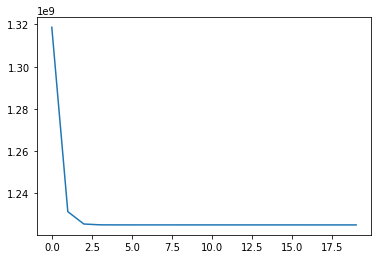

In [68]:
import matplotlib.pyplot as plt

cost_list = []
time_list = []
for t in range(20):
  derive_theta_0=0
  derive_theta_1=0
  for i in range(m):
    derive_theta_0 += theta_0+theta_1*Forecasted_price['Engine HP'].iloc[i]-Forecasted_price['MSRP'].iloc[i]
    derive_theta_1 += (theta_0+theta_1*Forecasted_price['Engine HP'].iloc[i]-Forecasted_price['MSRP'].iloc[i])*Forecasted_price['Engine HP'].iloc[i]
  theta_0 = theta_0 - learning_rate/m*derive_theta_0
  theta_1 = theta_1 - learning_rate/m*derive_theta_1
  cost=0
  for i in range(m): 
    cost += ((theta_0 + theta_1*Forecasted_price['Engine HP'].iloc[i]) - Forecasted_price['MSRP'].iloc[i])**2
  cost /= 2*m
  print(cost)
  cost_list.append(cost)
  time_list.append(t)

plt.plot(time_list, cost_list)
plt.show()

In [0]:
def find_univariable_linear_regression(dataframe,input_feature,output_feature,learning_rate,theta_0,theta_1):
  dataframe_new=dataframe[[input_feature,output_feature]].copy()
  #Drop null value
  dataframe_new.dropna(inplace=True)
  #Print m
  m=len(dataframe_new)
  print('m=',m)
  #Find cost of initial theta_0, theta_1, learning_rate
  cost=0
  for i in range(m):
    cost += ((theta_0 + theta_1*dataframe_new[input_feature].iloc[i]) - dataframe_new[output_feature].iloc[i])**2
  cost /= 2*m
  print('initial cost=',cost)
  #Find cost 
  import matplotlib.pyplot as plt

  cost_list = [cost]
  time_list = [0]
  is_continue=True
  t=1
  while is_continue:
    derive_theta_0=0
    derive_theta_1=0
    for i in range(m):
      derive_theta_0 += theta_0+theta_1*dataframe_new[input_feature].iloc[i]-dataframe_new[output_feature].iloc[i]
      derive_theta_1 += (theta_0+theta_1*dataframe_new[input_feature].iloc[i]-dataframe_new[output_feature].iloc[i])*dataframe_new[input_feature].iloc[i]
    theta_0 = theta_0 - learning_rate/m*derive_theta_0
    theta_1 = theta_1 - learning_rate/m*derive_theta_1
    cost=0
    for i in range(m): 
      cost += ((theta_0 + theta_1*dataframe_new[input_feature].iloc[i]) - dataframe_new[output_feature].iloc[i])**2
    cost /= 2*m
    print(t,cost)
    cost_list.append(cost)
    time_list.append(t)
    
    t += 1
    
    if (cost_list[-1]-cost_list[-2])*100/cost_list[-2]<-0.01:
      is_continue=False
    
      plt.plot(time_list, cost_list)
      plt.show()
  
  

m= 11914
initial cost= 2614208977.8406496
1 2550066739.6155033


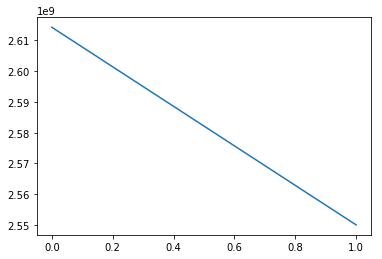

In [95]:
find_univariable_linear_regression(
    dataframe=data_df,
    input_feature='Year',
    output_feature='MSRP',
    learning_rate=0.00000001,
    theta_0=400,
    theta_1=0)

In [0]:
r=[1,2,3,4,5]

In [84]:
r[-1]

5